In [15]:
import numpy as np
import networkx  as nx
import matplotlib.pyplot as plt
import pandas as pd
import powerlaw

In [2]:
df = pd.read_csv("../data/edges.csv")
df = pd.read_csv("../data/edges.csv")

In [3]:
G = nx.from_pandas_edgelist(df,"# source", " target",create_using=nx.Graph)

In [4]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

In [67]:
node_with_highest_degree = max(G.nodes(), key=G.degree)
highest_degree = G.degree(node_with_highest_degree)
print("Node with highest degree:", node_with_highest_degree)
print("Degree:", highest_degree)

Node with highest degree: 1
Degree: 35946


In [72]:
len(G.nodes())

58743

In [10]:
def distribution(degree):
    hist, bins_edge = np.histogram(degree, bins=np.arange(0.5,10**4+1.5,1), density=True)
    
    P = hist*np.diff(bins_edge)             # distribution = density*deltaK
    K = bins_edge[:-1]+bins_edge[:1]
    index_remove = []                       # load index with distribution zero
    
    for idk,elements in enumerate(P):
        if(elements==0):
            index_remove.append(idk) 
    # Removing elements in k_mean and distribution with distribution = 0 (empty box)
    p_real = np.delete(P,index_remove)      
    k_real = np.delete(K,index_remove)
    return k_real,p_real

In [11]:
k, pk = distribution(degree_sequence)

In [29]:
#results = powerlaw.Fit(degree_sequence)
fit = powerlaw.Fit(degree_sequence, xmax=1000)
print(fit.xmax)
print(fit.fixed_xmax)

#R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
1000.0rogress: 99%
True


Calculating best minimal value for power law fit


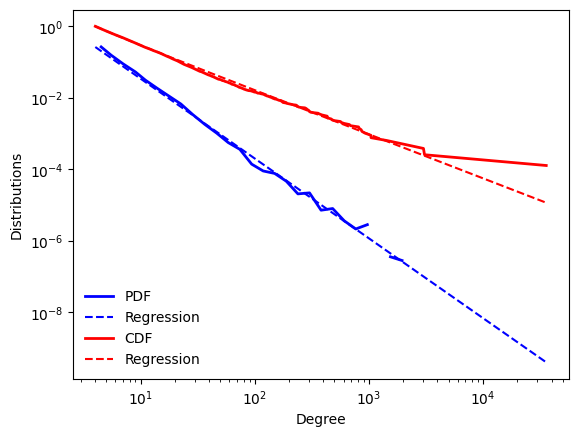

In [54]:
data = degree_sequence
fit = powerlaw.Fit(data, discrete=True)
####
figCCDF = fit.plot_pdf(color='b', linewidth=2,label="PDF")
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF,label="Regression")
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF,label="CDF")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF,label="Regression")

handles, labels = figCCDF.get_legend_handles_labels()
leg = figCCDF.legend(handles, labels, loc=3)
leg.draw_frame(False)
####
figCCDF.set_ylabel(u"Distributions")
figCCDF.set_xlabel(r"Degree")
filename = '../results/Distributions'
plt.savefig(filename+'.pdf', bbox_inches='tight')
#savefig(figname+'.eps', bbox_inches='tight')

In [46]:
fit.alpha
fit.xmin

4.0

In [63]:
fit.alpha

2.231241794850208

In [55]:
def real_pl(xmin,xmax,a, x):
    A = (xmin**(-a+1)-xmax**(-a+1))/a
    y = []
    for i in range(len(x)):
        y.append(A*x[i]**(-a))
    return y

In [61]:
y = real_pl(fit.xmin,max(k),fit.alpha,k)

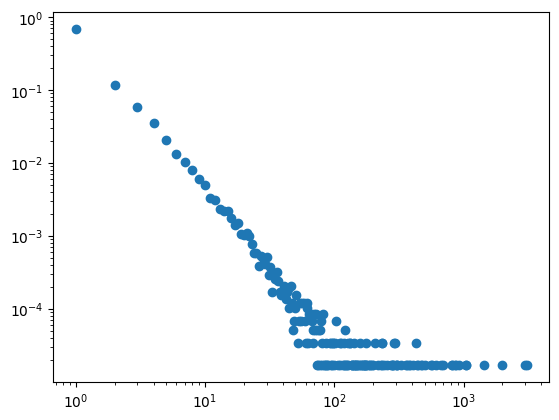

In [68]:
plt.plot(k,pk,'o')
#plt.plot(k,y)
plt.xscale("log")
plt.yscale("log")
plt.show()